In [97]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.model_selection as model_selection

In [98]:
X_train = pd.read_csv('X_train_w_ID.csv', index_col=0)

In [99]:
X_train.head()

,DESYNPUF_ID,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
99816,E6761B8CFB0ABF4B,1,1,51,2,2,2,2,2,2,...,0.633333,51.333333,71.666667,0.633333,0.133333,12.333333,0.033333,6.666667,129.666667,2
90616,D12DE586AFF0561E,1,1,39,1,1,2,2,2,2,...,0.366667,35.666667,123.333333,1.666667,0.366667,26.000000,0.100000,14.333333,640.000000,2
73437,A96B76F1BB51A4FC,0,1,36,2,2,2,2,2,2,...,0.300000,21.000000,134.666667,1.300000,0.433333,45.666667,0.033333,1.333333,257.000000,2
92945,D6931ECBE97ED42D,0,1,46,2,2,2,2,2,2,...,0.900000,37.000000,0.000000,0.000000,0.000000,0.000000,0.066667,3.333333,40.333333,2
27337,3EEB742DBF6EF04F,0,1,31,2,2,2,2,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1


In [100]:
X_test = pd.read_csv('X_test_w_ID.csv', index_col = 0)

In [101]:
Y_train = pd.read_csv('Y_train.csv', index_col = 0, header= None, names = ['Y'])
Y_test = pd.read_csv('Y_test.csv', index_col = 0, header= None, names = ['Y'])

In [102]:
Y_train.head()

,Y
99816,0
90616,0
73437,0
92945,0
27337,0


In [103]:
Y_test.head()

,Y
88539,0
51690,0
81304,0
51084,0
83115,0


In [104]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BENE_SEX_IDENT_CD,83270.0,0.557067,0.496736,0.000000,0.000000,1.000000,1.000000,1.000000
BENE_RACE_CD,83270.0,1.284016,0.750402,1.000000,1.000000,1.000000,1.000000,5.000000
SP_STATE_CODE,83270.0,25.722721,15.521622,1.000000,11.000000,25.000000,39.000000,54.000000
SP_ALZHDMTA,83270.0,1.832365,0.373544,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CHF,83270.0,1.743017,0.436973,1.000000,1.000000,2.000000,2.000000,2.000000
SP_CHRNKIDN,83270.0,1.861799,0.345113,1.000000,2.000000,2.000000,2.000000,2.000000
SP_CNCR,83270.0,1.948085,0.221858,1.000000,2.000000,2.000000,2.000000,2.000000
SP_COPD,83270.0,1.911505,0.284016,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DEPRESSN,83270.0,1.819827,0.384334,1.000000,2.000000,2.000000,2.000000,2.000000
SP_DIABETES,83270.0,1.710052,0.453741,1.000000,1.000000,2.000000,2.000000,2.000000


In [105]:
#prevent data leakage
train_X = X_train.drop(['DESYNPUF_ID'], axis=1)
test_X = X_test.drop(['DESYNPUF_ID'], axis=1)

In [106]:
#Add Y variable for data analysis
train_X['Y'] = Y_train

In [107]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
88539,1,1,15,2,1,2,2,2,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4
51690,1,1,3,2,2,2,2,2,2,2,...,0.033333,0.000000,181.000000,2.833333,0.866667,61.333333,0.3,193.000000,374.000000,3
81304,1,1,42,2,2,2,2,2,2,2,...,0.166667,8.000000,50.333333,0.733333,0.133333,12.000000,0.2,56.333333,114.666667,2
51084,1,2,33,2,2,2,2,2,2,2,...,1.900000,141.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,141.000000,3
83115,0,1,14,2,2,2,2,2,2,2,...,0.600000,20.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.333333,2


Variable descriptions:

Sex_Ident: 1 = Male, 2= Female
Race: 1 = White, 2 = Black, 3 = Others, 4 = Hispanic
Binary variables: 1 = Yes, 2 = No 


/Users/ksenia/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


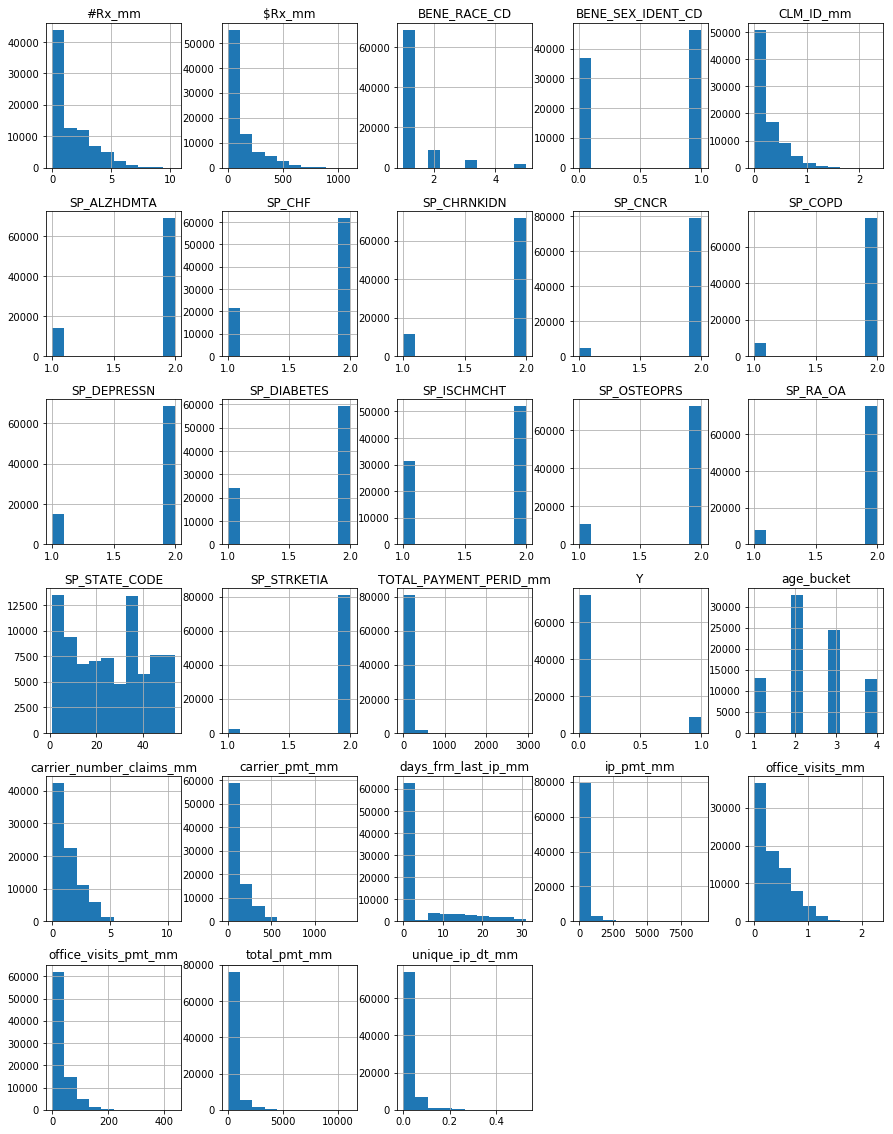

In [108]:
#Plot histograms of all features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
train_X.hist(ax = ax)
plt.show()

In [109]:
#Correlations with target variable
c_mat = train_X.corr()
print(c_mat['Y'].sort_values(ascending=False))

Y                           1.000000
carrier_number_claims_mm    0.208775
office_visits_mm            0.195265
carrier_pmt_mm              0.188355
office_visits_pmt_mm        0.164932
CLM_ID_mm                   0.154578
total_pmt_mm                0.121887
TOTAL_PAYMENT_PERID_mm      0.106830
$Rx_mm                      0.071666
unique_ip_dt_mm             0.070269
#Rx_mm                      0.064132
ip_pmt_mm                   0.056321
age_bucket                  0.019981
BENE_SEX_IDENT_CD           0.010793
SP_STATE_CODE               0.000646
BENE_RACE_CD               -0.014376
days_frm_last_ip_mm        -0.040770
SP_RA_OA                   -0.095006
SP_OSTEOPRS                -0.095377
SP_CNCR                    -0.107101
SP_STRKETIA                -0.141274
SP_DEPRESSN                -0.147561
SP_ALZHDMTA                -0.163025
SP_CHF                     -0.217994
SP_ISCHMCHT                -0.223260
SP_DIABETES                -0.231348
SP_COPD                    -0.239095
S

Because our features show 2 for not having the disease, the correlations revealed the strongest positive relationship between having kidney disease and hospitalization within the next 6 months (29%), followed by having COPD, diabetes, ischemic heart disease, and CHF.

Outside of the condition features, number of carrier claims and number of doctor visits had the strongest correlations (aroun 20%). 

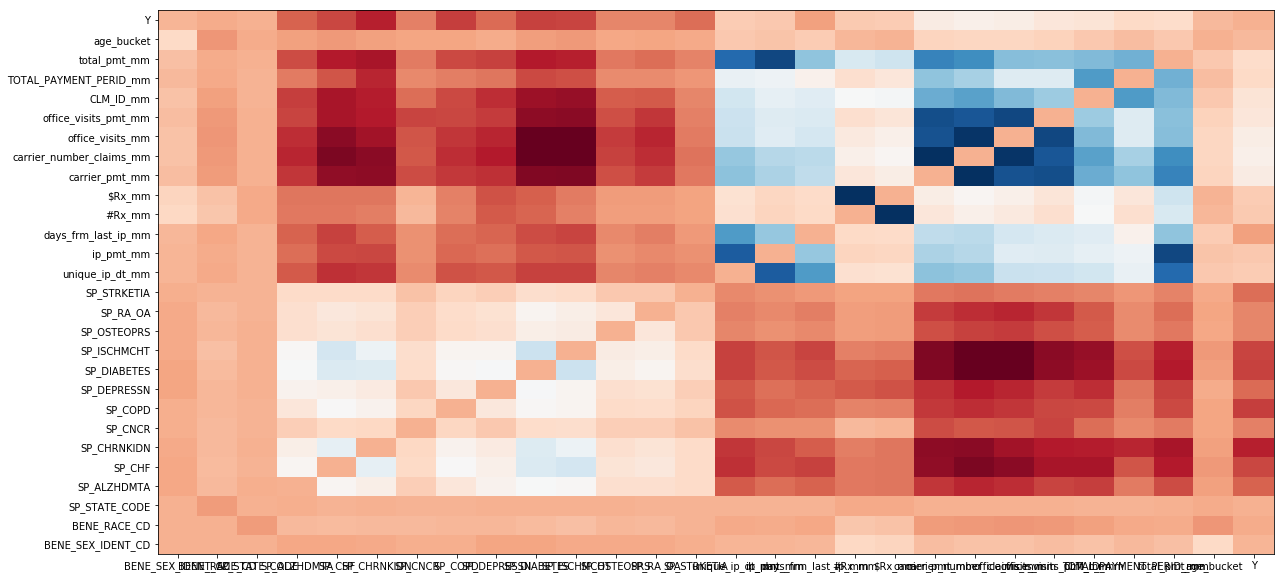

In [111]:
#Visualize correlations. Red signifies the strongest negative correlations

for i in range(c_mat.shape[0]):
    c_mat.iloc[i,i] = 0
 
    
fig, ax = plt.subplots(figsize = (20,10))
heatmap = ax.pcolor(c_mat, cmap=plt.cm.RdBu)

#Set the tick labels and center them
ax.set_xticks(np.arange(c_mat.shape[0])+0.5, minor=False)
ax.set_yticks(np.arange(c_mat.shape[1])+0.5, minor=False)
ax.set_xticklabels(c_mat.index.values, minor=False)
ax.set_yticklabels(c_mat.index.values, minor=False)

heatmap.set_label('Pearson Correlation')

plt.show()

In [114]:
#Split dataset into testing and training

train_X = train_X.drop('Y', axis=1)

test_Y = Y_test
train_Y = Y_train

In [115]:
test_X.head()

,BENE_SEX_IDENT_CD,BENE_RACE_CD,SP_STATE_CODE,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,...,#Rx_mm,$Rx_mm,carrier_pmt_mm,carrier_number_claims_mm,office_visits_mm,office_visits_pmt_mm,CLM_ID_mm,TOTAL_PAYMENT_PERID_mm,total_pmt_mm,age_bucket
88539,1,1,15,2,1,2,2,2,2,2,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,4
51690,1,1,3,2,2,2,2,2,2,2,...,0.033333,0.000000,181.000000,2.833333,0.866667,61.333333,0.3,193.000000,374.000000,3
81304,1,1,42,2,2,2,2,2,2,2,...,0.166667,8.000000,50.333333,0.733333,0.133333,12.000000,0.2,56.333333,114.666667,2
51084,1,2,33,2,2,2,2,2,2,2,...,1.900000,141.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,141.000000,3
83115,0,1,14,2,2,2,2,2,2,2,...,0.600000,20.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,20.333333,2


In [116]:
#Base Rate: predicting negative all the time
share_non_target = train_Y[train_Y.Y == 0].shape[0]/train_Y.shape[0]

base_rate = share_non_target

print('Base rate of forecast represented by always predicting not being hospitalized is: ', str(base_rate))

Base rate of forecast represented by always predicting not being hospitalized is:  0.8963732436651856


In [119]:
#Let's test features with a decision tree

from sklearn import tree

#Create a Decision Tree instance
clf = tree.DecisionTreeClassifier(criterion='entropy')

#Train decision tree
clf.fit(train_X, train_Y)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [120]:
labels = train_X.columns
labels

Index(['BENE_SEX_IDENT_CD', 'BENE_RACE_CD', 'SP_STATE_CODE', 'SP_ALZHDMTA',
       'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
       'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA',
       'unique_ip_dt_mm', 'ip_pmt_mm', 'days_frm_last_ip_mm', '#Rx_mm',
       '$Rx_mm', 'carrier_pmt_mm', 'carrier_number_claims_mm',
       'office_visits_mm', 'office_visits_pmt_mm', 'CLM_ID_mm',
       'TOTAL_PAYMENT_PERID_mm', 'total_pmt_mm', 'age_bucket'],
      dtype='object')

[ 0.00314019  0.00303855  0.0232749   0.00694486  0.00607805  0.09680884
  0.00484412  0.0281695   0.00560648  0.01905728  0.01658356  0.00338813
  0.0033345   0.00501196  0.18154782  0.00099874  0.04493789  0.11318603
  0.02107563  0.0284097   0.03474379  0.14398014  0.02588128  0.12080061
  0.02716172  0.0242632   0.00773253]


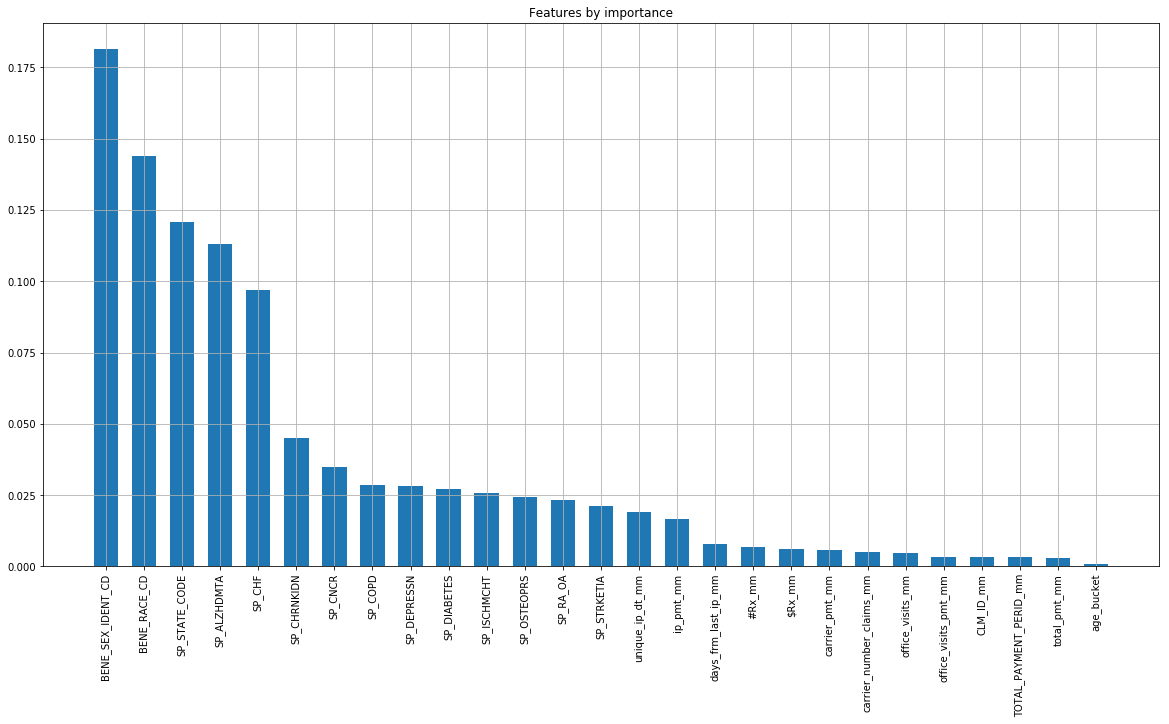

In [121]:
#Visualize feature importance
import matplotlib.pyplot as plt
%matplotlib inline

importances = clf.feature_importances_
#print(len(importances))

labels = train_X.columns

assert(len(importances) == len(labels))

print(importances)

#Sort and order importances in descending order
importances.sort()
importances = importances[::-1]

N = len(importances)
xx = np.linspace(0, 1, N)
plt.figure(figsize=(20,10))
plt.bar(xx, importances, width=1/N/1.5)
plt.xticks(xx, labels, rotation='vertical')
plt.title('Features by importance')

plt.grid(True)

Patient gender, race, state, presence of Alzheimers disease, and history of heart failure were identified as the strongest predictors of hospitalization within the next 6 months.

In [124]:
from sklearn import metrics

#Predicting train_df
fcst_train = clf.predict(train_X)

#Predicting test_df
fcst_test = clf.predict(test_X)

train_accuracy = clf.score(train_X, train_Y)
test_accuracy = clf.score(test_X, test_Y)

train_recall = metrics.recall_score(train_Y, fcst_train)
test_recall = metrics.recall_score(test_Y, fcst_test)

print('Train accuracy:',train_accuracy, '\nTest accuracy:', test_accuracy, '\nDifference:', 
     train_accuracy - test_accuracy)

print('\nTrain recall: ', train_recall, '\nTest recall: ', test_recall, '\nDifference: ', train_recall-test_recall)

Train accuracy: 0.999951963492 
Test accuracy: 0.943329610549 
Difference: 0.0566223529436

Train recall:  0.999536446865 
Test recall:  0.714334822963 
Difference:  0.285201623902


While the test accuracy came at 94%, the recall is only 0.71. That's the metric we'll try to improve as it's important to identify patients at risk of hospitalization to intervene and prevent it.

In [125]:
#Tune the decision tree by testing hyperparameters
min_samples_split_values = np.linspace(200, 1000, 10, dtype = int)
min_samples_leaf_values = np.linspace(50, 200, 10, dtype = int)

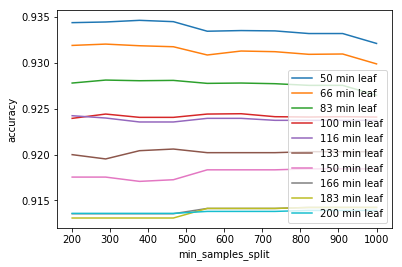

In [128]:
import matplotlib.pyplot as plt

max_acc= []
for leaf in min_samples_leaf_values:
    accuracy = []
    
    for split in min_samples_split_values:
        
        clf = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split = split, min_samples_leaf = leaf)
        
        clf.fit(train_X, train_Y)
        
        fcst_tests = clf.predict(test_X)
        
        accuracy.append(metrics.accuracy_score(test_Y, fcst_tests))
 
    max_acc.append(max(accuracy))
    plt.plot(min_samples_split_values, accuracy, label = str(leaf) + ' min leaf')
    plt.xlabel('min_samples_split')
    plt.ylabel('accuracy')
    plt.legend(loc="lower right")

In [130]:
max(max_acc)

0.93464711604280004

In [133]:
index_max_accuracy = max_acc.index(max(max_acc))

best_samples_split = min_samples_split_values[index_max_accuracy]
best_min_leaf = min_samples_leaf_values[index_max_accuracy]
best_accuracy = max_acc[index_max_accuracy]

print('Best Min Samples Split: ' + str(best_samples_split) + '\nBest Min Leaf: ' + str(best_min_leaf) 
      + '\nBest Accuracy: ' + str(best_accuracy))

Best Min Samples Split: 200
Best Min Leaf: 50
Best Accuracy: 0.934647116043


In [134]:
#We beat the base rate for accuracy
print('{0:.5f}'.format((best_accuracy - base_rate)))

0.03827


#### Conclusion

Conclusion: I analyzed demographics, health features, RX, doctor visits, and claims history for predicting hospitalization in the next 6 months. 

Correlation analysis revealed the strongest positive relationship between having kidney disease and hospitalization within the next 6 months (29%), followed by having COPD, diabetes, ischemic heart disease, and heart failure.

Outside of the condition features, number of carrier claims and number of doctor visits had the strongest correlations (aroun 20%).

Decision tree analysis uncovered the strongest non-linear relationships with such factors as Gender, and Race, state, presence of Alzheimers disease, and history of heart failure.

We defined the base rate to be the share of all patients who weren't hospitalized in the next 6 months. The base rate is very high at around 89%. The decision tree with new features outperformed the base rate reaching an accuracy of 0.93.